# Extracting behavior features with ResNet50 pre-trained model  
## 1000 - dimension 

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import PIL
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import h5py
from pickle import dump

## Loading and visualising frames 

4167


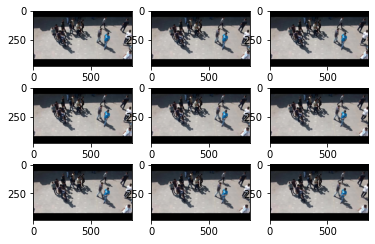

In [2]:
behavior = pd.read_csv('data/MotionEmotion/reduced_beh_labelled_dataset.csv')
behavior = behavior.rename(columns={'Unnamed: 0':'org_idx'}) 
paths = behavior.path
label = behavior.label
print(len(paths))
for i in range(9):
    plt.subplot(330 + 1 + i)
    #print(file_list[i])
    filename = paths[i]
    image = imread(filename)
    plt.imshow(image)

In [3]:
behavior

,org_idx,path,label
0,0,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
1,1,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
2,2,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
3,3,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
4,4,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
...,...,...,...
4162,43778,data/MotionEmotion/Motion_Emotion_Dataset/vide...,2
4163,43779,data/MotionEmotion/Motion_Emotion_Dataset/vide...,2
4164,43780,data/MotionEmotion/Motion_Emotion_Dataset/vide...,2
4165,43781,data/MotionEmotion/Motion_Emotion_Dataset/vide...,2


In [4]:
image = Image.open(paths[1])
print(image.format) 
data = asarray(image) #converting image into array
print(data.shape)

JPEG
(480, 854, 3)


## Splitting data to feed into feature extractor

There is a 70/30 split between train and test sets

Furthermore it is stratified due to class imabalance 

Test and train sets must be sorted as there is an order on the sequence of frames selected  

In [5]:
def split(behavior):
    X = behavior['path'] # np.array(features).reshape(len(features) ,-1) 
    y = behavior['label']
    x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)
    return x_train, x_test, y_train, y_test, X, y

In [6]:
x_train, x_test, y_train, y_test, X, y = split(behavior)
x_train = x_train.sort_values()
x_test = x_test.sort_values()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

## Feeding feature extractor with images 
### Specifications: 

Model: ResNet50 - pretrained

Weights: Imagnet

Input: 224,224 

Output: 1, 1000

    Which are the number of features extracted per frame. The features in the last FC are extracted.
    Layer: predictions (Dense) output shape:(none, 1000) # of params: 2049000 connected to
       ['avg_pool[0][0]'] 


In [7]:
from numpy import expand_dims

def train_extraction(images):
    paths = images
    features = []
    for image in paths: 
        images_ = load_img(image, target_size=(224, 224))
        # convert the image pixels to a numpy array
        images_ = img_to_array(images_)
        # reshape data for the model
        images_ = images_.reshape((1, images_.shape[0], images_.shape[1], images_.shape[2])) # prepare the image for the model  
        images_ = preprocess_input(images_)
        # load model
        model = ResNet50(weights="imagenet") #include_top=False?
        #model.summary()
        # remove the output layer
        model = Model(inputs=model.inputs, outputs=model.layers[-1].output) #add batch size?
        #model.summary()
        # get extracted features
        features_ = model.predict(images_)
        print(features_.shape)
        features.append(features_)
    model.summary()
    return features

In [8]:
def test_extraction(images):
    paths = images
    features = []
    for image in paths: 
        images_ = load_img(image, target_size=(224, 224))
        # convert the image pixels to a numpy array
        images_ = img_to_array(images_)
        # reshape data for the model
        images_ = images_.reshape((1, images_.shape[0], images_.shape[1], images_.shape[2])) # prepare the image for the model
        images_ = preprocess_input(images_)
        # load model
        model = ResNet50(weights="imagenet") #include_top=False?
        #model.summary()
        # remove the output layer
        model = Model(inputs=model.inputs, outputs=model.layers[-1].output) #add batch size?
        #model.summary()
        # get extracted features
        features_ = model.predict(images_)
        print(features_.shape)
        features.append(features_)
    #model.summary()
    return features

In [9]:
train_features = train_extraction(x_train)
test_features = test_extraction(x_test)

2022-04-29 13:12:47.708637: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)


(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)


(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)


(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)


 conv2_block1_1_conv (Conv2D)   (None, 56, 56, 64)   4160        ['pool1_pool[0][0]']             
                                                                                                  
 conv2_block1_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block1_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block1_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block1_1_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block1_1_conv (Conv2D)   (None, 28, 28, 128)  32896       ['conv2_block3_out[0][0]']       
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block1_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block1_1_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block4_1_conv (Conv2D)   (None, 28, 28, 128)  65664       ['conv3_block3_out[0][0]']       
                                                                                                  
 conv3_block4_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block4_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block4_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block4_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                )                                 'conv4_block2_3_bn[0][0]']      
                                                                                                  
 conv4_block2_out (Activation)  (None, 14, 14, 1024  0           ['conv4_block2_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block2_out[0][0]']       
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block5_add (Add)         (None, 14, 14, 1024  0           ['conv4_block4_out[0][0]',       
                                )                                 'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_block5_out (Activation)  (None, 14, 14, 1024  0           ['conv4_block5_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block6_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block5_out[0][0]']       
                                                                                                  
 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
          

 conv5_block2_3_bn (BatchNormal  (None, 7, 7, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block2_add[0][0]']       
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block2_out[0][0]']       
                                                                                                  
 conv5_blo

(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)


(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)


## Training 4 SVM models with the extracted features and their corresponding labels
### Reshaping features to feed into GridSearch and classifiers

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import scipy

train_features = np.array(train_features).reshape(len(train_features) ,-1) 
train_features = StandardScaler().fit_transform(train_features)

test_features = np.array(test_features).reshape(len(test_features) ,-1) 
test_features = StandardScaler().fit_transform(test_features)



## Searching for best parameters for each SVM

In [11]:
from sklearn.metrics import classification_report
'''
Linear
'''
param_grid_l = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),'kernel': ['linear']}
grid_l = RandomizedSearchCV(SVC(),param_grid_l,refit=True,verbose=2)
grid_l.fit(train_features, y_train)
print(grid_l.best_params_)
grid_predictions_l = grid_l.predict(test_features)
print(confusion_matrix(y_test, grid_predictions_l))
print(classification_report(y_test,grid_predictions_l))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=229.21064004973059, gamma=0.010520138342147115, kernel=linear; total time=   1.1s
[CV] END C=229.21064004973059, gamma=0.010520138342147115, kernel=linear; total time=   1.2s
[CV] END C=229.21064004973059, gamma=0.010520138342147115, kernel=linear; total time=   1.2s
[CV] END C=229.21064004973059, gamma=0.010520138342147115, kernel=linear; total time=   1.3s
[CV] END C=229.21064004973059, gamma=0.010520138342147115, kernel=linear; total time=   1.1s
[CV] END C=104.96719444392444, gamma=0.48049826956937114, kernel=linear; total time=   0.9s
[CV] END C=104.96719444392444, gamma=0.48049826956937114, kernel=linear; total time=   1.2s
[CV] END C=104.96719444392444, gamma=0.48049826956937114, kernel=linear; total time=   1.1s
[CV] END C=104.96719444392444, gamma=0.48049826956937114, kernel=linear; total time=   1.1s
[CV] END C=104.96719444392444, gamma=0.48049826956937114, kernel=linear; total time=   1.2s
[CV] END C=206

In [12]:
'''
Radial
'''
param_grid_r = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),'kernel': ['rbf']}
grid_r = RandomizedSearchCV(SVC(),param_grid_r,refit=True,verbose=2)
grid_r.fit(train_features, y_train)
print(grid_r.best_params_)
grid_predictions_r = grid_r.predict(test_features)
print(confusion_matrix(y_test, grid_predictions_r))
print(classification_report(y_test,grid_predictions_r))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=67.45675417584415, gamma=0.06988149571606792, kernel=rbf; total time=  11.0s
[CV] END C=67.45675417584415, gamma=0.06988149571606792, kernel=rbf; total time=  10.9s
[CV] END C=67.45675417584415, gamma=0.06988149571606792, kernel=rbf; total time=  11.1s
[CV] END C=67.45675417584415, gamma=0.06988149571606792, kernel=rbf; total time=  11.4s
[CV] END C=67.45675417584415, gamma=0.06988149571606792, kernel=rbf; total time=  11.1s
[CV] END C=17.268681427346515, gamma=0.01872995955330214, kernel=rbf; total time=  11.1s
[CV] END C=17.268681427346515, gamma=0.01872995955330214, kernel=rbf; total time=  11.4s
[CV] END C=17.268681427346515, gamma=0.01872995955330214, kernel=rbf; total time=  10.3s
[CV] END C=17.268681427346515, gamma=0.01872995955330214, kernel=rbf; total time=  11.7s
[CV] END C=17.268681427346515, gamma=0.01872995955330214, kernel=rbf; total time=  11.0s
[CV] END C=182.32858177943055, gamma=0.131298556677539

In [13]:
'''
Polynomial
'''
param_grid_p = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),'degree':scipy.stats.expon(scale=1) ,'kernel': ['poly']}
grid_p = RandomizedSearchCV(SVC(),param_grid_p,refit=True,verbose=2)
grid_p.fit(train_features, y_train)
print(grid_p.best_params_)
grid_predictions_p = grid_p.predict(test_features)
print(confusion_matrix(y_test, grid_predictions_p))
print(classification_report(y_test,grid_predictions_p))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=43.20721367056216, degree=3.941184482721668, gamma=0.08767837074844691, kernel=poly; total time=   2.2s
[CV] END C=43.20721367056216, degree=3.941184482721668, gamma=0.08767837074844691, kernel=poly; total time=   2.1s
[CV] END C=43.20721367056216, degree=3.941184482721668, gamma=0.08767837074844691, kernel=poly; total time=   1.9s
[CV] END C=43.20721367056216, degree=3.941184482721668, gamma=0.08767837074844691, kernel=poly; total time=   2.4s
[CV] END C=43.20721367056216, degree=3.941184482721668, gamma=0.08767837074844691, kernel=poly; total time=   2.3s
[CV] END C=398.276718973448, degree=0.4859187461267476, gamma=0.2792546418859655, kernel=poly; total time=   4.7s
[CV] END C=398.276718973448, degree=0.4859187461267476, gamma=0.2792546418859655, kernel=poly; total time=   4.7s
[CV] END C=398.276718973448, degree=0.4859187461267476, gamma=0.2792546418859655, kernel=poly; total time=   4.8s
[CV] END C=398.2767189

In [14]:
from sklearn.model_selection import GridSearchCV

'''
Sigmoid
'''
grid_predictions_s = { 'C': [0.11, 10, 100],'kernel': ['sigmoid']}
grid_s = GridSearchCV(SVC(),grid_predictions_s,refit=True,verbose=2)
grid_s.fit(train_features, y_train)
print(grid_s.best_params_)
grid_predictions_s = grid_s.predict(test_features)
print(confusion_matrix(y_test, grid_predictions_s))
print(classification_report(y_test,grid_predictions_s))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .............................C=0.11, kernel=sigmoid; total time=   5.0s
[CV] END .............................C=0.11, kernel=sigmoid; total time=   5.2s
[CV] END .............................C=0.11, kernel=sigmoid; total time=   4.6s
[CV] END .............................C=0.11, kernel=sigmoid; total time=   5.1s
[CV] END .............................C=0.11, kernel=sigmoid; total time=   5.2s
[CV] END ...............................C=10, kernel=sigmoid; total time=   1.5s
[CV] END ...............................C=10, kernel=sigmoid; total time=   1.7s
[CV] END ...............................C=10, kernel=sigmoid; total time=   1.7s
[CV] END ...............................C=10, kernel=sigmoid; total time=   1.6s
[CV] END ...............................C=10, kernel=sigmoid; total time=   1.8s
[CV] END ..............................C=100, kernel=sigmoid; total time=   1.3s
[CV] END ..............................C=100, ker

## Training SVM model 
#### Hyperparameters are tuned based on the results from the grid searches

In [22]:
linear = svm.SVC(kernel='linear', C=229, decision_function_shape='ovo').fit(train_features, y_train)
rbf = svm.SVC(kernel='rbf', gamma=0.007, C=15, decision_function_shape='ovo').fit(train_features, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=43, gamma=0.08, decision_function_shape='ovo').fit(train_features, y_train)
sig = svm.SVC(kernel='sigmoid', C=0.11, decision_function_shape='ovo').fit(train_features, y_train)

## Predicting classes from the test set


In [23]:
linear_pred = linear.predict(test_features)
poly_pred = poly.predict(test_features)
rbf_pred = rbf.predict(test_features)
sig_pred = sig.predict(test_features)

## Visualising and Evaluating Results

In [24]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(test_features, y_test)
accuracy_poly = poly.score(test_features, y_test)
accuracy_rbf = rbf.score(test_features, y_test)
accuracy_sig = sig.score(test_features, y_test)


Accuracy Linear Kernel: 0.9928057553956835
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       167
           2       0.99      0.99      0.99       131
           3       0.98      1.00      0.99       115
           4       1.00      0.99      0.99       215
           5       0.99      1.00      0.99       623

    accuracy                           0.99      1251
   macro avg       0.99      0.99      0.99      1251
weighted avg       0.99      0.99      0.99      1251



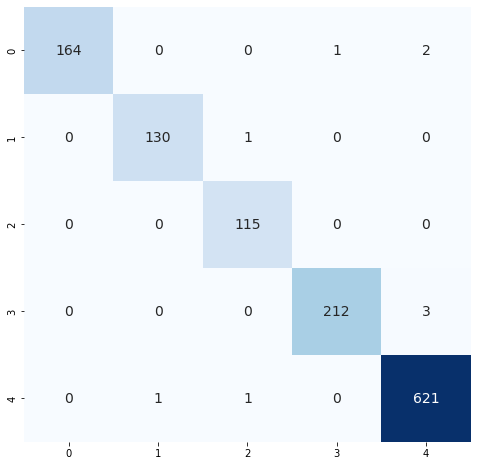

In [25]:
# creating a confusion matrix
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
print('Accuracy Linear Kernel:', accuracy_lin)
cm_lin = confusion_matrix(y_test, linear_pred)
ax = sns.heatmap(cm_lin, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(y_test, linear_pred))


Accuracy Polynomial Kernel: 0.9864108713029577
              precision    recall  f1-score   support

           1       0.99      0.95      0.97       167
           2       0.98      0.98      0.98       131
           3       0.94      0.99      0.97       115
           4       1.00      1.00      1.00       215
           5       0.99      0.99      0.99       623

    accuracy                           0.99      1251
   macro avg       0.98      0.98      0.98      1251
weighted avg       0.99      0.99      0.99      1251



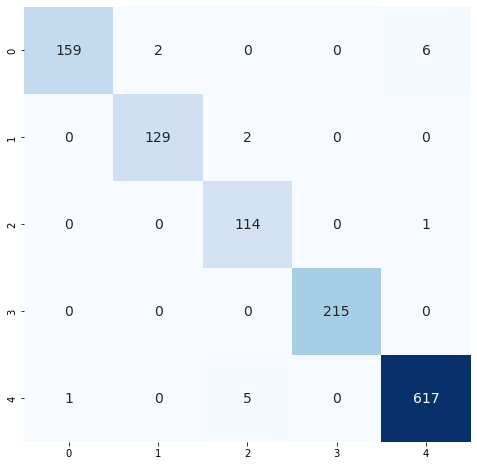

In [29]:
print('Accuracy Polynomial Kernel:', accuracy_poly)
cm_poly = confusion_matrix(y_test, poly_pred)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
ax = sns.heatmap(cm_poly, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(y_test, poly_pred))


Accuracy Radial Basis Kernel: 0.8537170263788969
              precision    recall  f1-score   support

           1       1.00      0.61      0.76       167
           2       1.00      0.56      0.72       131
           3       1.00      0.72      0.84       115
           4       1.00      0.87      0.93       215
           5       0.77      1.00      0.87       623

    accuracy                           0.85      1251
   macro avg       0.95      0.75      0.82      1251
weighted avg       0.89      0.85      0.85      1251



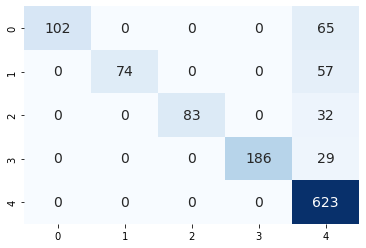

In [27]:
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
cm_rbf = confusion_matrix(y_test, rbf_pred)
ax = sns.heatmap(cm_rbf, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(y_test, rbf_pred))


Accuracy Sigmoid Kernel: 0.6610711430855316
              precision    recall  f1-score   support

           1       0.89      0.49      0.63       167
           2       0.69      0.31      0.43       131
           3       0.65      0.23      0.34       115
           4       0.97      0.31      0.47       215
           5       0.62      0.98      0.76       623

    accuracy                           0.66      1251
   macro avg       0.76      0.46      0.52      1251
weighted avg       0.73      0.66      0.62      1251



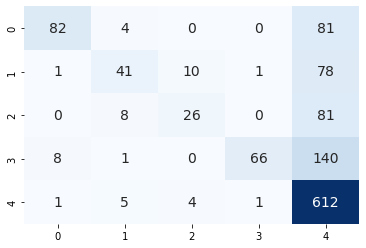

In [28]:
print('Accuracy Sigmoid Kernel:', accuracy_sig)
cm_sig = confusion_matrix(y_test, sig_pred)
ax = sns.heatmap(cm_sig, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(y_test, sig_pred))
